<h2> Project: United Kigdom Road Accident Data Analysis</h2>
<h3> Inclusive Years: 2019 - 2022</h3>
<h3> Analyst: Rogemson P. Molina</h3>

<h2> Importing Libraries</h2>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

<h2> Importing data file</h2>

In [2]:
accident = pd.read_csv('dataset\\accident_data.csv')

<h2> Accessing the dataframe</h2>

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2> Checking and filling up null values</h2>

In [4]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

In [5]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('Unknown road surface condition')

In [6]:
accident['Road_Type'] = accident['Road_Type'].fillna('Unknown road type')

In [7]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [8]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Unknown weather condition')

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2> Changing data types

<h3> Before changing data types


In [10]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [11]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')

In [13]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')

In [14]:
accident['District Area'] = accident['District Area'].astype('category')

In [15]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [16]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')

In [17]:
accident['Road_Type'] = accident['Road_Type'].astype('category')

In [18]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [19]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

<h3> After changing data types</h3>

In [20]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [21]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2> Adding new colums (Year, Month, Day)</h2>

In [22]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

In [23]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return np.nan

accident['Season'] = accident['Month'].apply(month_to_season)

In [24]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek,Season
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2,Summer
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1,Summer
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Unknown road type,Urban,Unknown weather condition,Taxi/Private hire car,2019,8,26,0,Summer
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4,Summer
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Unknown road type,Urban,Unknown weather condition,Other vehicle,2019,9,3,1,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4,Winter
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0,Winter
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2,Winter
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2,Winter


<h1> INSIGHTS</h1>

<h2> UNIVARIATE


<h2> Question 1: Total Accidents that happened on Daylight?
<h3> Insight 1: The total accidents happened during Daylight is 484880 </h3>

In [25]:
accident[accident['Light_Conditions'] == 'Daylight'].value_counts().sum()

np.int64(484880)

<h2> Question 2: Total Accidents that happened on 2022?
<h3> Insight 2: The total accidents happened during 2022 is 144419 </h3>

In [26]:
accident[accident['Year'] == 2022].value_counts().sum()

np.int64(144419)

<h2> Question 3: How many accidents happen during the winter of 2019?
<h3> Insight 3:There is a total of 43316 total accidents during the winter of 2019</h3>

In [27]:
winter_months = [1, 2, 12]
accident[(accident['Year'] == 2019) & (accident['Month'].isin(winter_months))].shape[0]

43316

<h2> Question 4: Show accidents happened each month
<h3> Insight 4: The insight suggested that there are more accidents happening during October and November</h3>

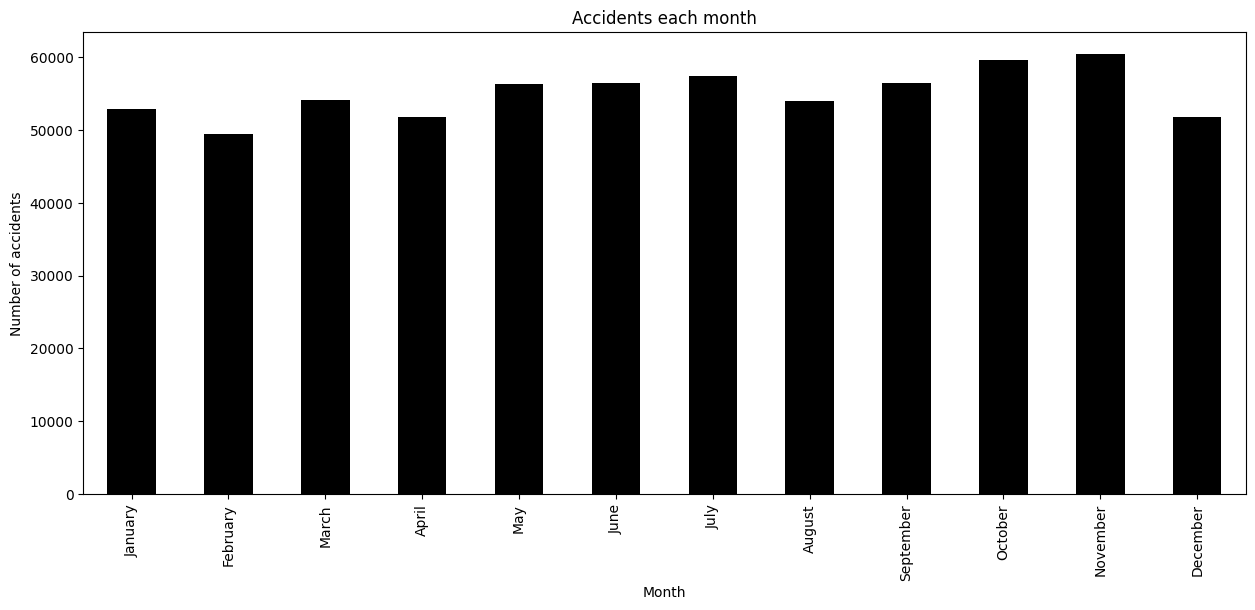

In [28]:
acc_month = accident['Month'].value_counts().sort_index()

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

acc_month.index = acc_month.index.map(month_names)

plt.figure(figsize=(15, 6))
acc_month.plot(kind='bar', color='black')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.title('Accidents each month')
plt.show()

<h2> Question 5: How many accidents happened depending on severity?
<h3> Insight 5: There are more slight accidents</h3>

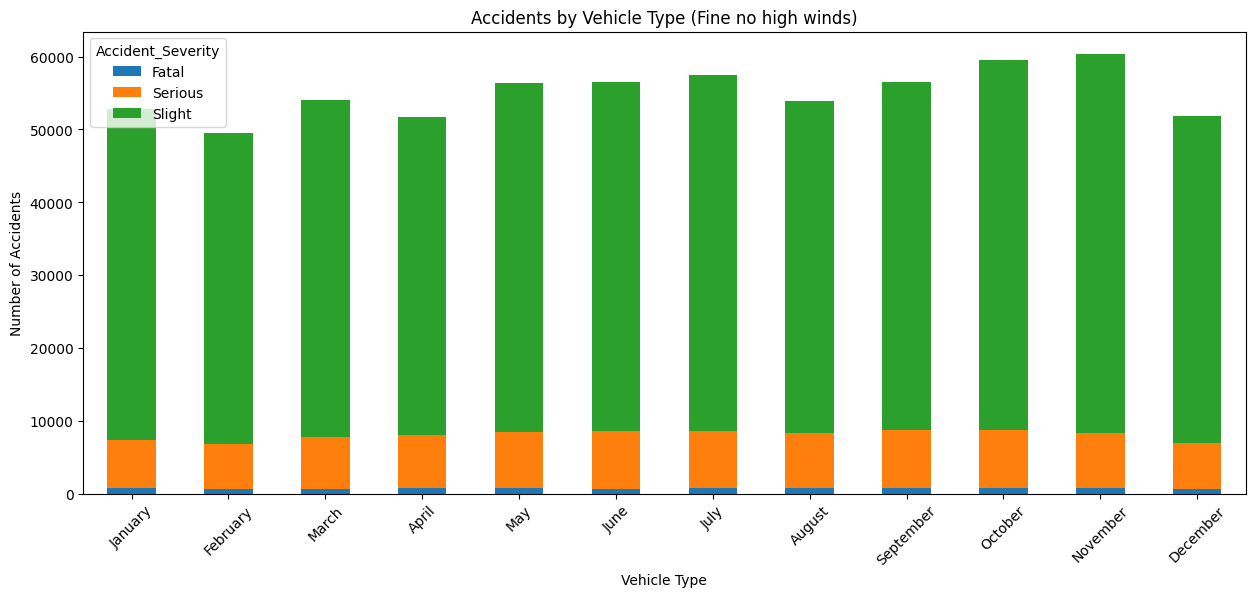

In [29]:
acc_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

acc_severity.index = acc_severity.index.map(month_names)
acc_severity.plot(kind='bar', stacked=True)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Vehicle Type (Fine no high winds)')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 6)
plt.show()

<h2> Question 6: What is the average District accidents happen?
<h3> Insight 6: The District Area with average accidents is Birmingham</h3>

In [30]:
accident['District Area'].mode()[0]

'Birmingham'

<h2> BIVARIATE

<h2> Question 7: Average casualties base on accident severity?
<h3> Insight 7: Fatal accidents have the highest average value (≈1.90), suggesting they are considerably more impactful.</h3>

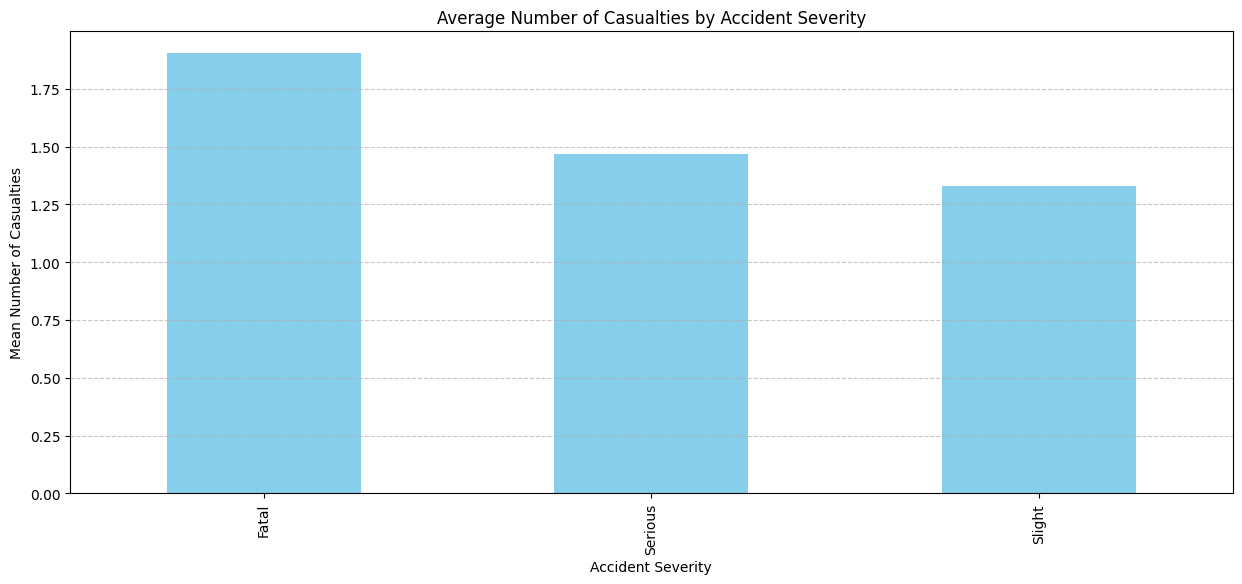

In [31]:
mean_casualties = accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

plt.figure(figsize=(15, 6))
mean_casualties.plot(kind='bar', color='skyblue')
plt.xlabel('Accident Severity')
plt.ylabel('Mean Number of Casualties')
plt.title('Average Number of Casualties by Accident Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2> Question 8: What vehicle(s) mostly got an accident on Snowing no high winds weather condition?
<h3> Insight 8: The vehicle type Car got the most accident totaling to 4748</h3>

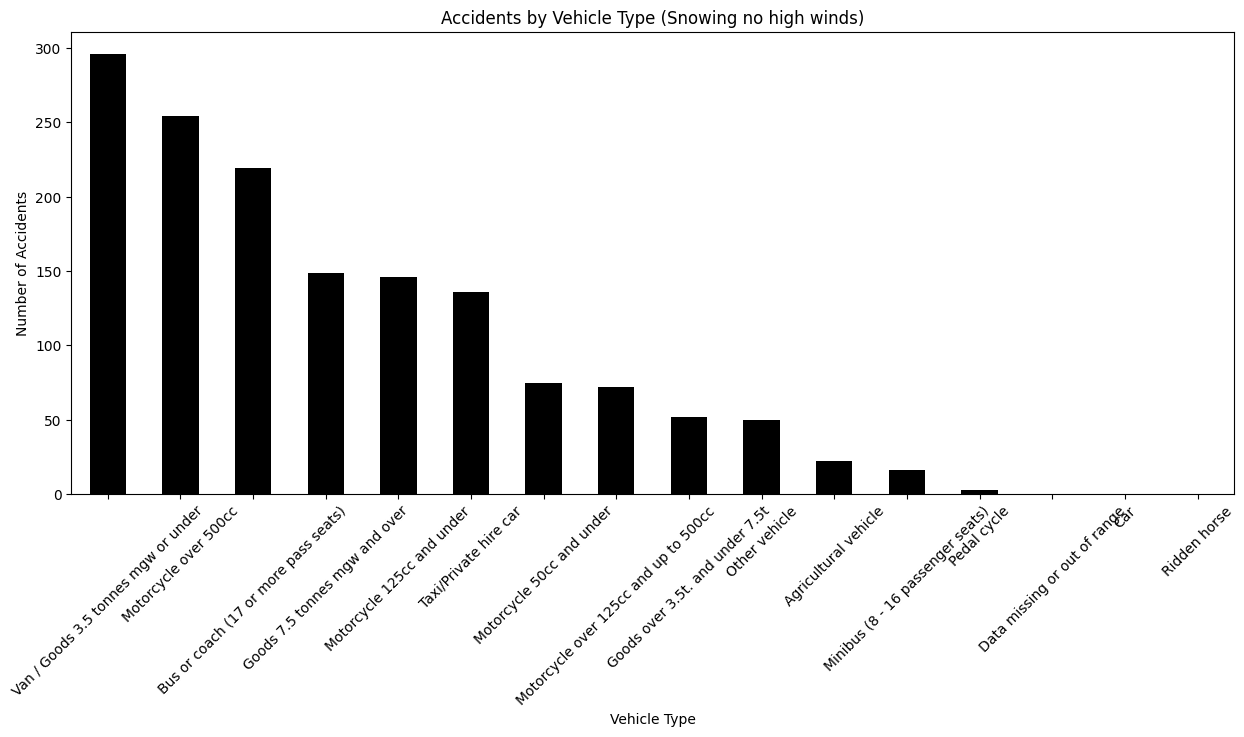

In [32]:
snowing_accidents = accident[accident["Weather_Conditions"] == "Snowing no high winds"]
no_cars = snowing_accidents[snowing_accidents['Vehicle_Type'] != 'Car']

vehicle_counts = no_cars['Vehicle_Type'].value_counts()

plt.figure(figsize=(15, 6))
vehicle_counts.plot(kind='bar', color='black')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Vehicle Type (Snowing no high winds)')
plt.xticks(rotation=45)
plt.show()

<h2> Question 9: What vehicle(s) mostly got an accident on Fine no high winds weather condition?
<h3> Insight 9: The vehicle type Car got the most accident totaling to 403324</h3>

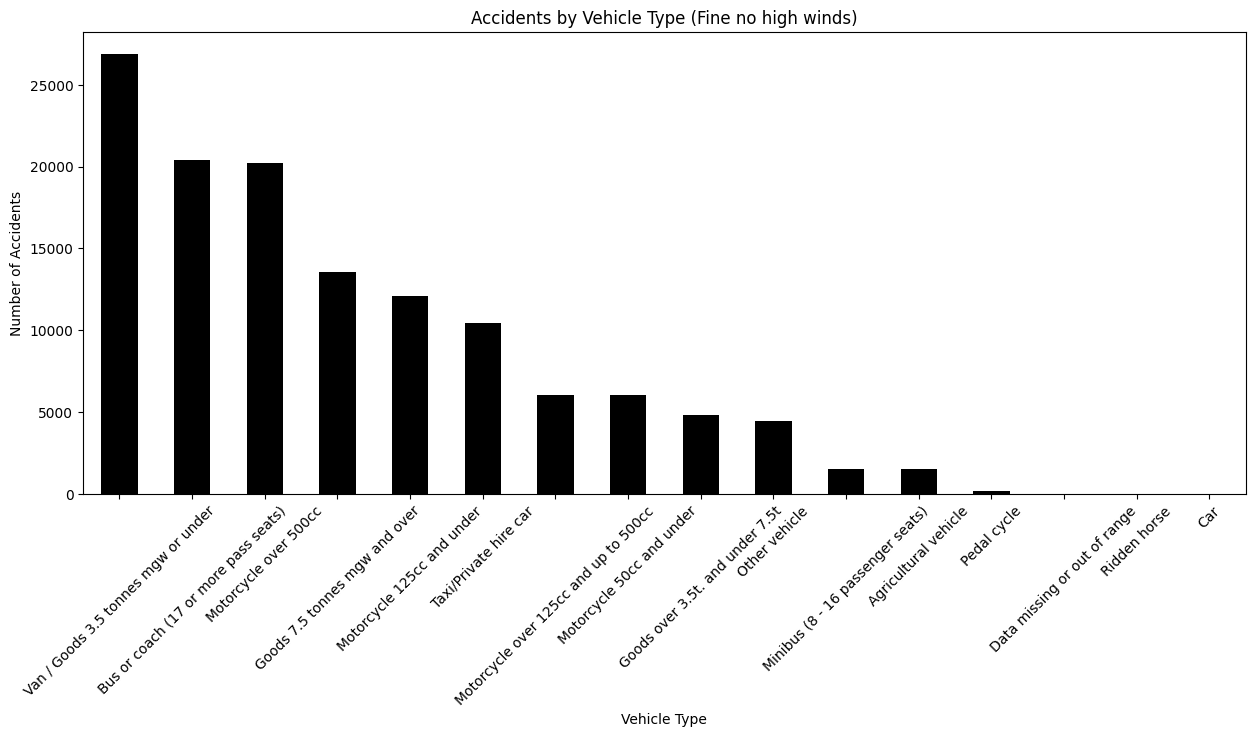

In [33]:
fine_accidents = accident[accident["Weather_Conditions"] == "Fine no high winds"]
no_cars_9 = fine_accidents[fine_accidents['Vehicle_Type'] != 'Car']

behikels = no_cars_9['Vehicle_Type'].value_counts()

plt.figure(figsize=(15, 6))
behikels.plot(kind='bar', color='black')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Vehicle Type (Fine no high winds)')
plt.xticks(rotation=45)
plt.show()

<h2> Question 10: What vehicle(s) mostly got an accident on Fog or mist weather condition?
<h3> Insight 10: The vehicle type Car got the most accident totaling to 2641</h3>

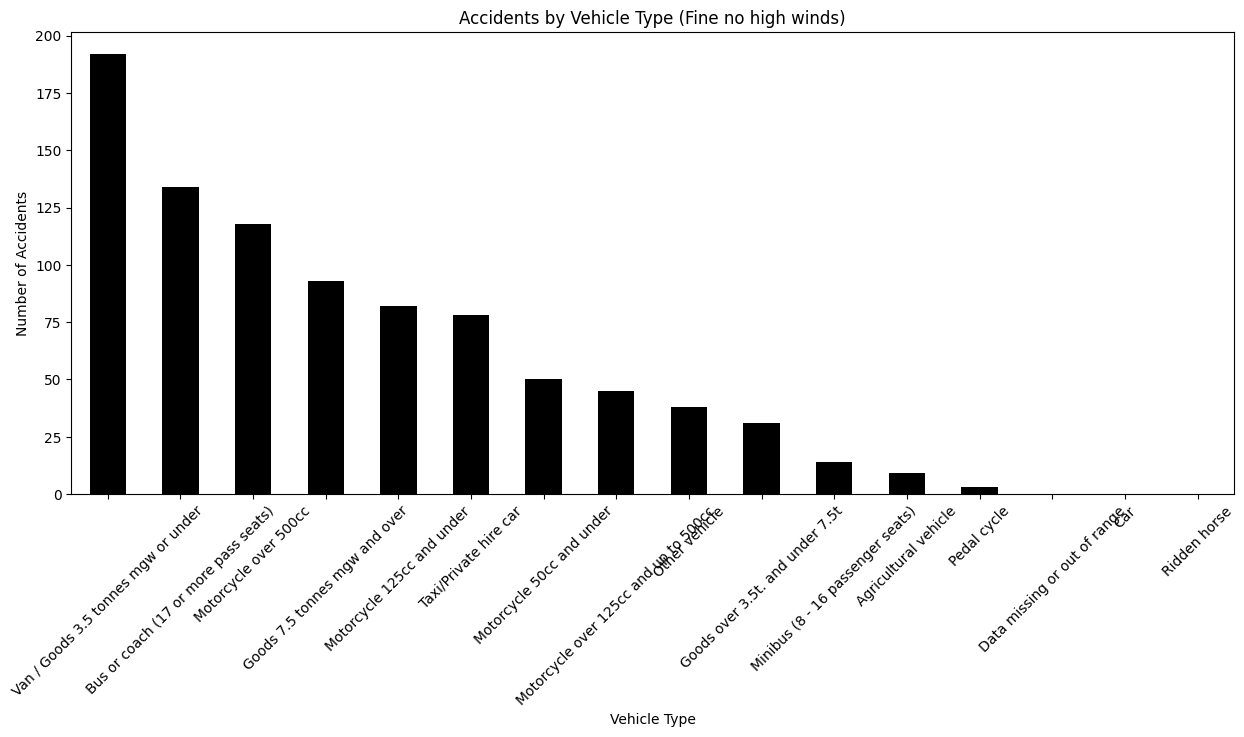

In [34]:
fog_accidents = accident[accident["Weather_Conditions"] == "Fog or mist"]
no_cars_10 = fog_accidents[fog_accidents['Vehicle_Type'] != 'Car']
behikels_10 = no_cars_10['Vehicle_Type'].value_counts()

plt.figure(figsize=(15, 6))
behikels_10.plot(kind='bar', color='black')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Vehicle Type (Fine no high winds)')
plt.xticks(rotation=45)
plt.show()

<h2> Question 11: What light condition mostly got an accident in Highland district area?
<h3> Insight 11: Most of the accidents happened at Highland happens on Daylight light condition</h3>

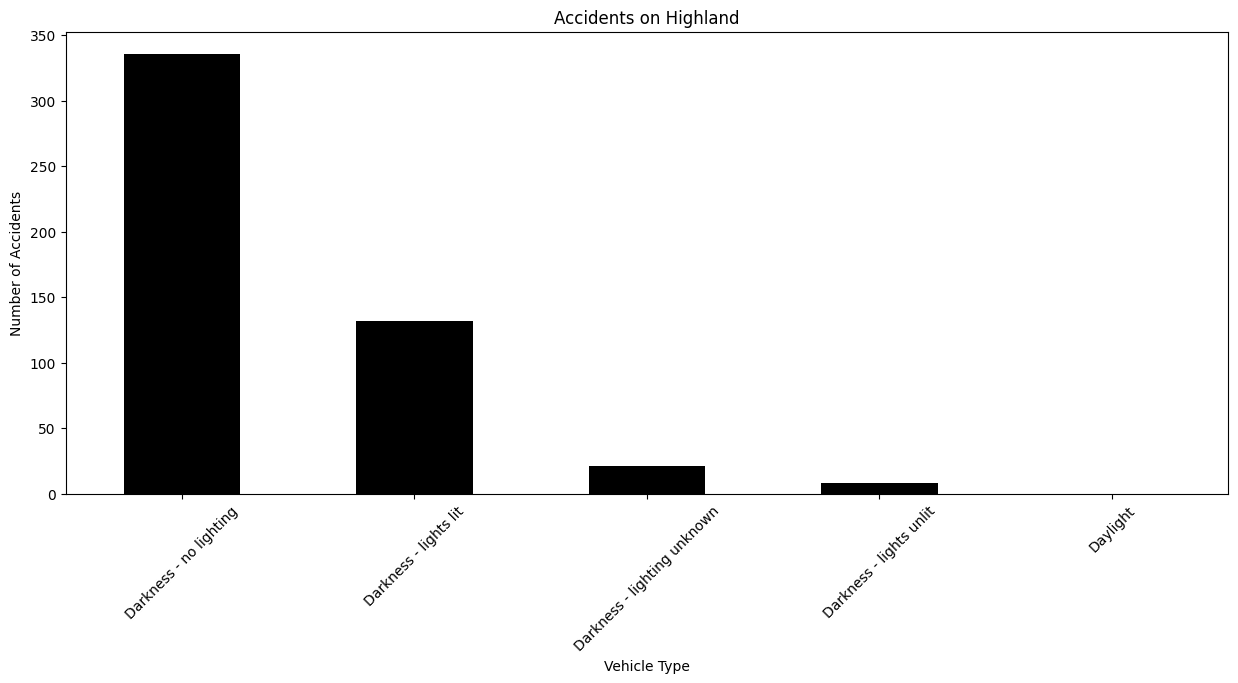

In [35]:
highland_accidents = accident[accident['District Area'] == 'Highland']

high_no_day = highland_accidents[highland_accidents['Light_Conditions'] != 'Daylight']
light_highland = high_no_day['Light_Conditions'].value_counts()

plt.figure(figsize=(15, 6))
light_highland.plot(kind='bar', color='black')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents on Highland')
plt.xticks(rotation=45)
plt.show()

<h2> Question 12: On what road surface condition got 2 or more casualties?
<h3> Insight 12: Dry road have more accidents with 2 or more casualties</h3>

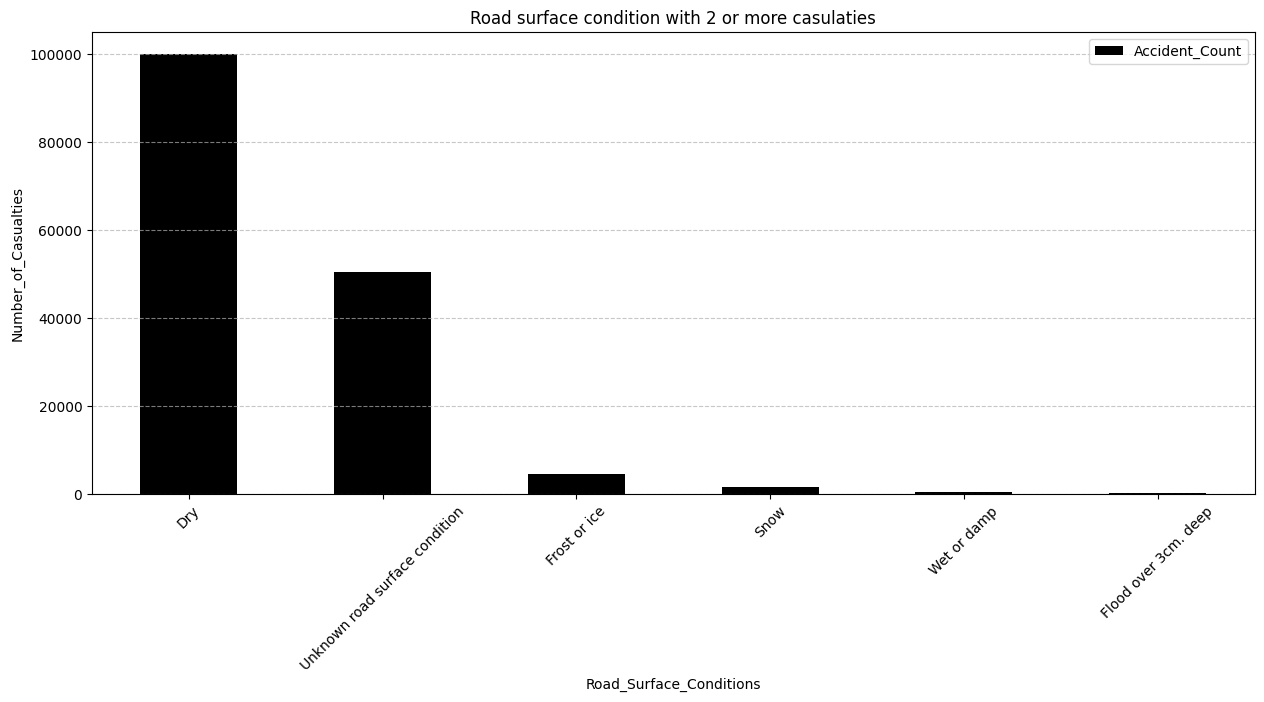

In [36]:
casualty_condition = accident[accident['Number_of_Casualties'] >= 2]
ins_12 = casualty_condition.groupby('Road_Surface_Conditions').size().reset_index(name='Accident_Count').sort_values('Accident_Count', ascending=False)

road_name = {
    0: 'Dry',
    1: 'Wet or damp',
    2: 'Frost or ice',
    3: 'Snow',
    4: 'Flood over 3cm. deep',
    5: 'Unknown road surface condition',
}

ins_12.index = ins_12.index.map(road_name)
ins_12.plot(kind='bar', color='black')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Number_of_Casualties')
plt.title('Road surface condition with 2 or more casulaties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 6)
plt.show()

<h2> Question 13: On what road type got the least casualties?
<h3> Insight 13: Slip road type got the least accident casulatie(s)</h3>

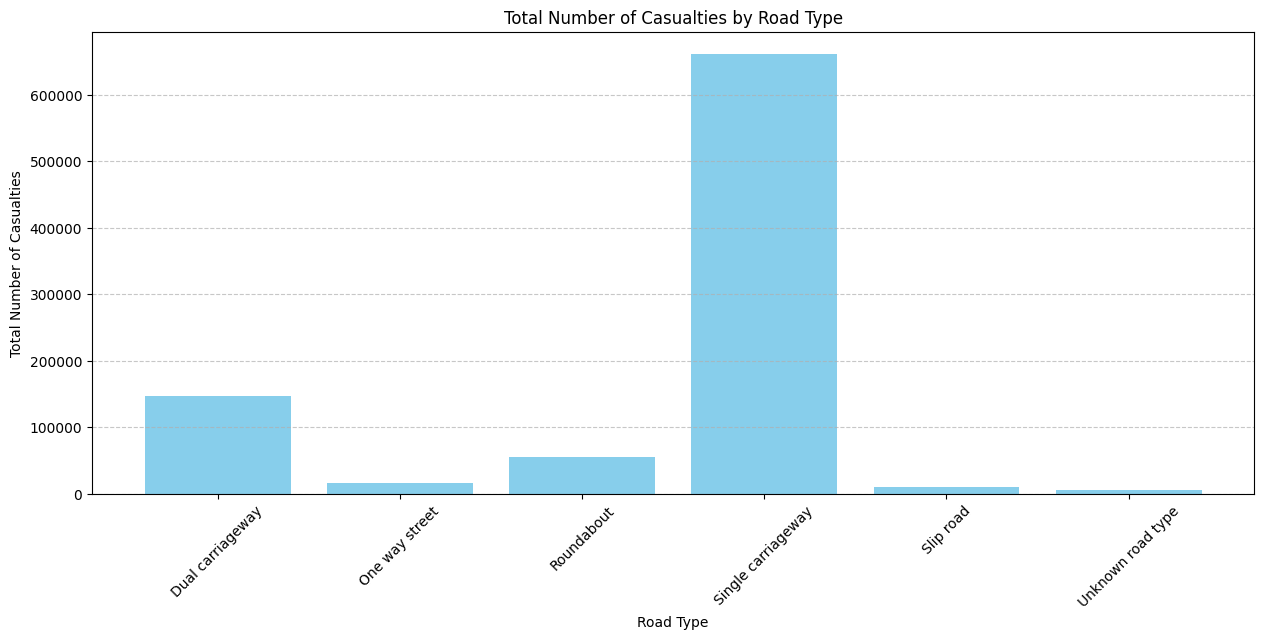

In [37]:
road_type_casualties = accident.groupby('Road_Type')['Number_of_Casualties'].sum().reset_index()
min_casualty = road_type_casualties.nsmallest(1, 'Number_of_Casualties')

plt.bar(road_type_casualties['Road_Type'], road_type_casualties['Number_of_Casualties'], color='skyblue')
plt.xlabel('Road Type')
plt.ylabel('Total Number of Casualties')
plt.title('Total Number of Casualties by Road Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().set_size_inches(15, 6)
plt.show()

<h2> Question 14: What date got the most accident happened?
<h3> Insight 14: The date 2019-11-30 got the most accident count that reach 704 total accidents on just a single day</h3>

In [38]:
accident.groupby('Accident Date').size().reset_index(name='Accident_Count').nlargest(1, 'Accident_Count')

,Accident Date,Accident_Count
333,2019-11-30,704


<h2> Question 15: What date got the most Serious accident happened?
<h3> Question 15: The data indicates that September 20, 2020, experienced the highest number of serious accidents, with 99 incidents reported.</h3>

In [39]:
date_with_serious_accidents = accident[accident['Accident_Severity'] == 'Serious']
date_with_serious_accidents.groupby('Accident Date').size().reset_index(name='Serious accident count').nlargest(1, 'Serious accident count')

,Accident Date,Serious accident count
628,2020-09-20,99


<h2> Question 16: On what kind of road type most of the Buses got a serious accident?
<h3> Insight 16: The data indicates that single carriageways are the most common road type for serious bus accidents, with 2,648 incidents reported.</h3>

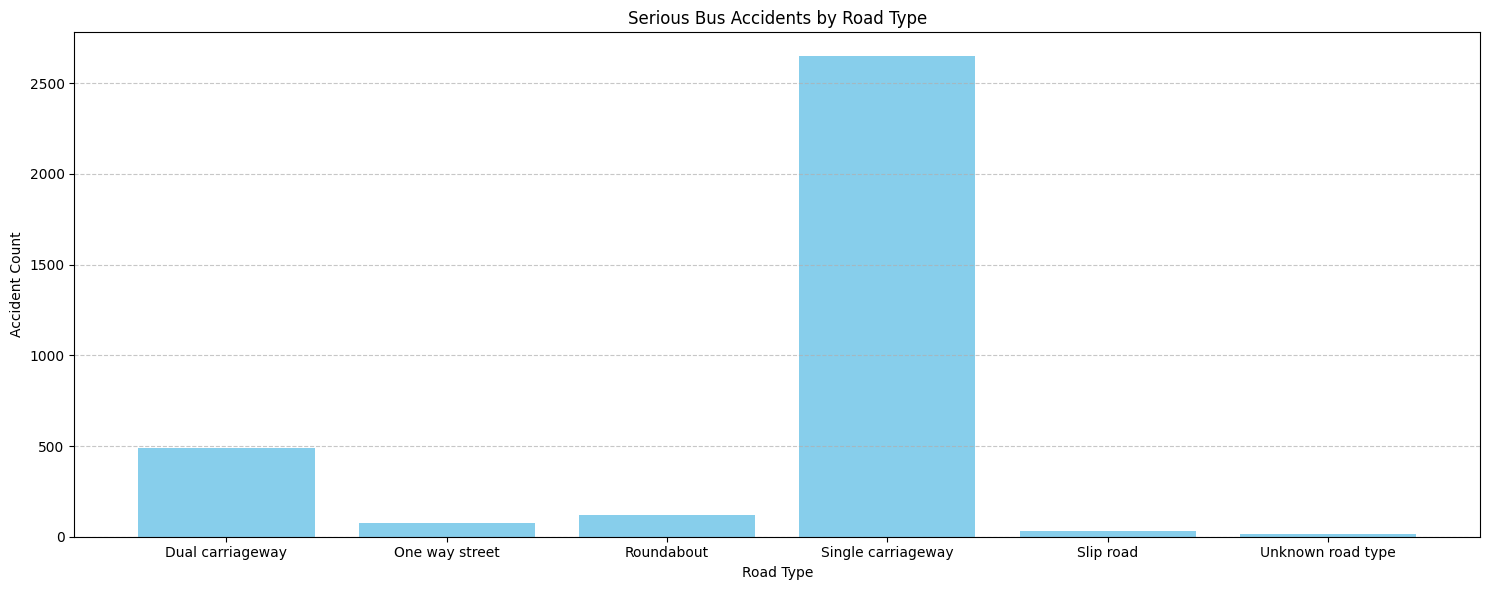

In [40]:
serious_bus_accident = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)')]
grouped_bus_accident = serious_bus_accident.groupby('Road_Type').size().reset_index(name='Accident_Count')

plt.figure(figsize=(15, 6))
plt.bar(grouped_bus_accident['Road_Type'], grouped_bus_accident['Accident_Count'], color='skyblue')
plt.xlabel('Road Type')
plt.ylabel('Accident Count')
plt.title('Serious Bus Accidents by Road Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> Question 17: Is there a correlation between Number of vehicles and Number of Casualties?
<h3> Insight 17: There is no correlation between the number of vehicles and number of casualties</h3>

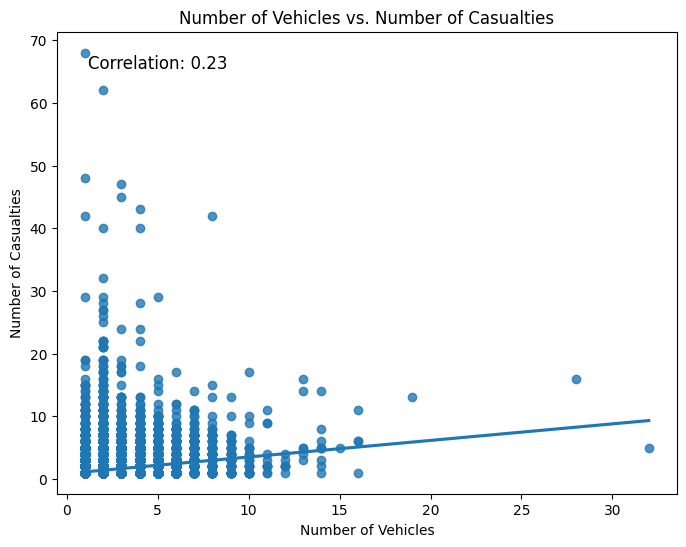

In [61]:
corr_value = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

plt.figure(figsize=(8,6))
sns.regplot(x='Number_of_Vehicles', y='Number_of_Casualties', data=accident)
plt.title("Number of Vehicles vs. Number of Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")

plt.text(0.05, 0.95, f"Correlation: {corr_value:.2f}",
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top')

plt.show()

<h2> Question 18: Is there a correlation between Light Condition and severity?
<h3> Insight 18: There is no correlation between the Light condition and number of casualties</h3>

In [42]:
f_stats, p_value = f_oneway(accident[accident['Light_Conditions'] == 'Daylight']['Number_of_Casualties'],
                            accident[accident['Light_Conditions'] == 'Darkness - no lighting']['Number_of_Casualties'])
p_value

np.float64(0.0)

<h2> Question 19: Is there a correlation between Number of vehicles and Latitude?
<h3> Insight 19: There is no correlation between the number of vehicles and the latitude</h3>

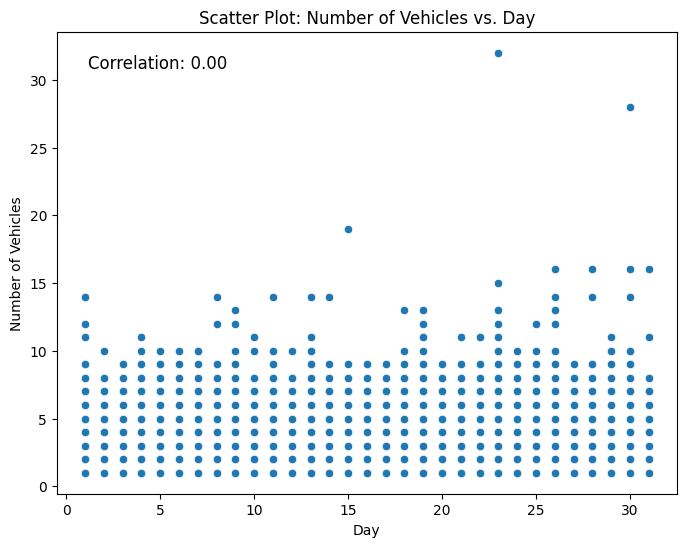

In [66]:
corr_value = accident['Number_of_Vehicles'].corr(accident['Day'])

# Create the scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Day', y='Number_of_Vehicles', data=accident)

# Add title and labels
plt.title("Scatter Plot: Number of Vehicles vs. Day")
plt.xlabel("Day")
plt.ylabel("Number of Vehicles")

# Annotate with the correlation value
plt.text(0.05, 0.95, f"Correlation: {corr_value:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.show()

<h2> Question 20: How many accidents happened on Urban or Rural area base on severity?
<h3> Insight 20: The data shows that while urban areas account for a higher overall number of accidents—especially in the serious and slight categories—rural areas have a notably higher count of fatal accidents. </h3>

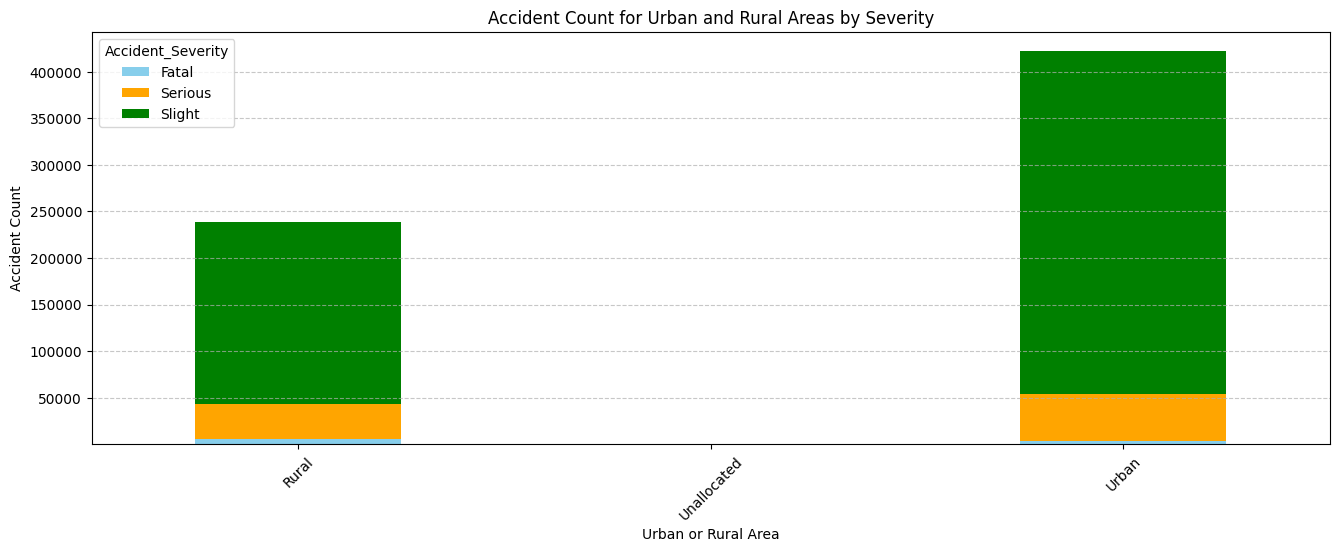

In [44]:
urban_rural_severity = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack(fill_value=0)

# Plot a stacked bar chart
urban_rural_severity.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'green'])
plt.xlabel('Urban or Rural Area')
plt.ylabel('Accident Count')
plt.title('Accident Count for Urban and Rural Areas by Severity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gcf().set_size_inches(15, 6)
plt.show()

<h2> MULTIVARIATE

<h2> Question 21: What vehicle(s) type got the least casulaties with the light condition of Darkness - no lighting ?
<h3> Insight 21: The agricultural vehicle got the least number of accident casualties</h3>

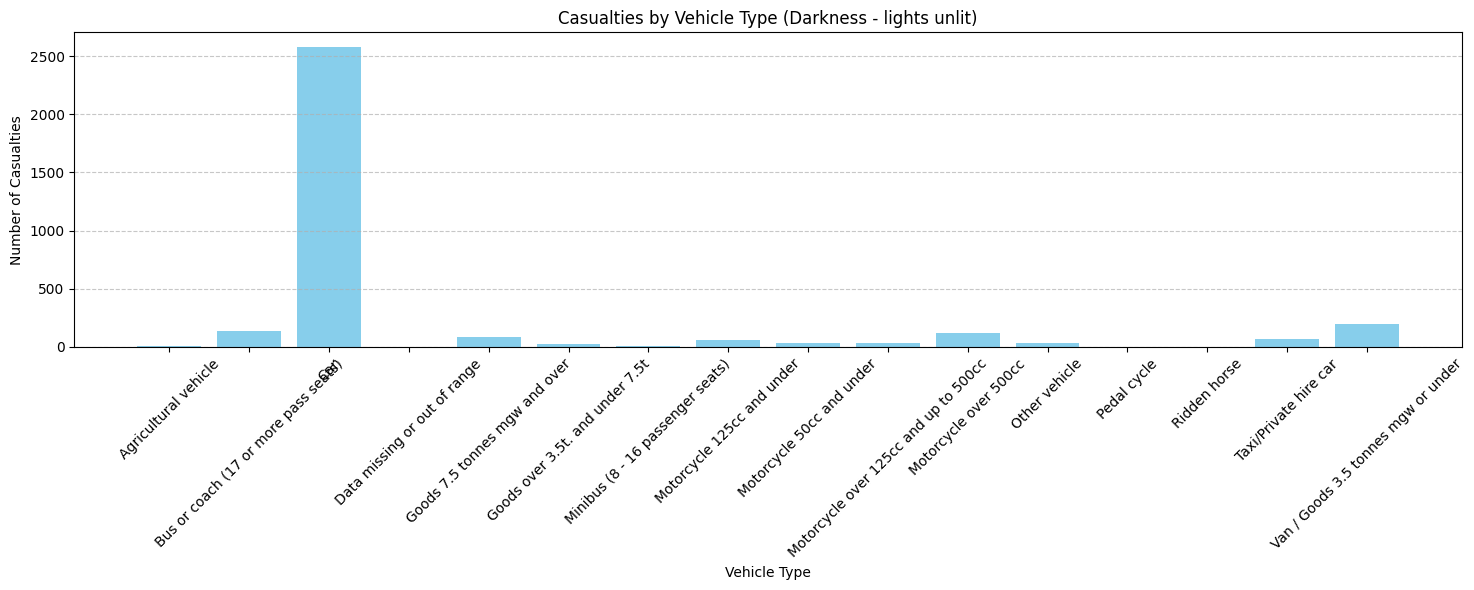

In [45]:
accident_dark = accident[accident['Light_Conditions'] == 'Darkness - lights unlit'].groupby('Vehicle_Type')['Number_of_Casualties'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.bar(accident_dark['Vehicle_Type'], accident_dark['Number_of_Casualties'], color='skyblue')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Casualties')
plt.title('Casualties by Vehicle Type (Darkness - lights unlit)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> Question 22: What Vehicle Type got a fatal severity with 2 or more casualties, at Urban Area on a Dry road condition? 
<h3> Insight 22: The data indicates that 88.57% of fatal accidents with 2 or more casualties in urban areas on dry roads involved cars.</h3>

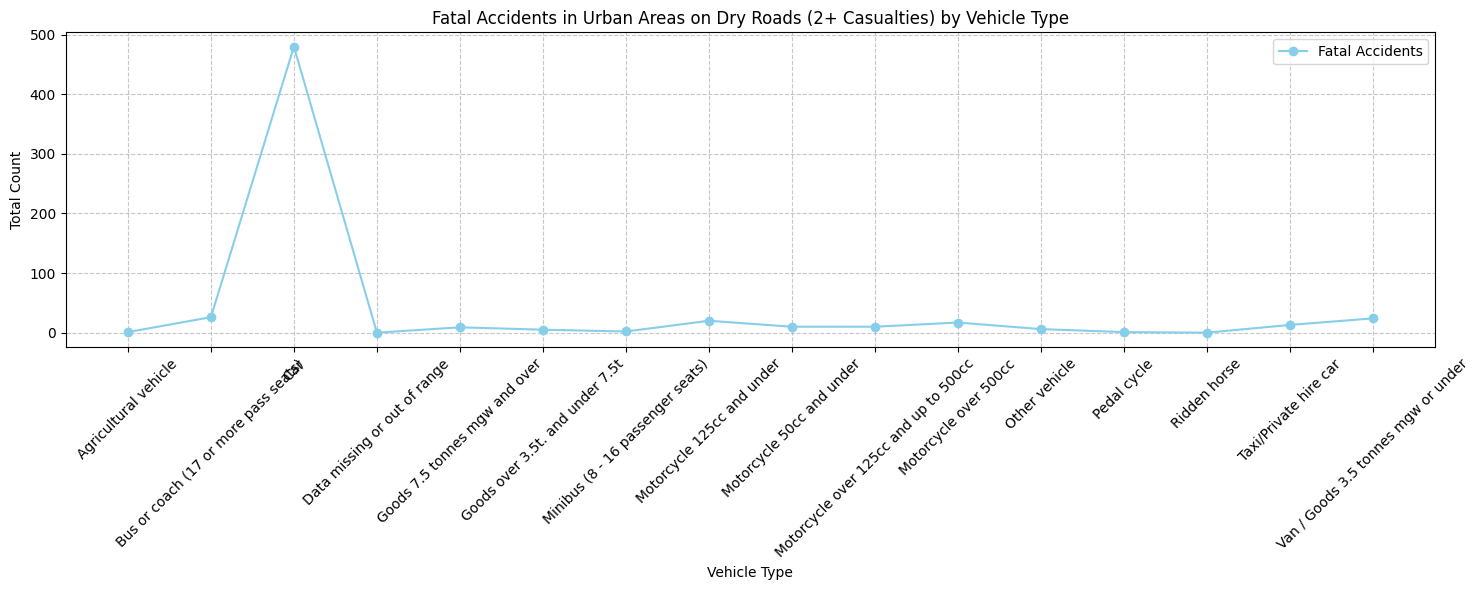

In [46]:
dry_urban = accident[
    (accident['Urban_or_Rural_Area'] == 'Urban') & 
    (accident['Road_Surface_Conditions'] == 'Dry') & 
    (accident['Number_of_Casualties'] >= 2) &
    (accident['Accident_Severity'] == 'Fatal')
]

vehicle_counts = dry_urban.groupby('Vehicle_Type').size().reset_index(name='Total count')

plt.figure(figsize=(15, 6))
plt.plot(vehicle_counts['Vehicle_Type'], vehicle_counts['Total count'], 
         marker='o', linestyle='-', color='skyblue', label='Fatal Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Count')
plt.title('Fatal Accidents in Urban Areas on Dry Roads (2+ Casualties) by Vehicle Type')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<h2> Question 23: On what kind of Road Conditions most of the Motorcycle 125cc and under got a fatal accident?
<h3> Insight 23: Most of the Motorycle accidents happened at Single carriageway with fatal severity</h3>

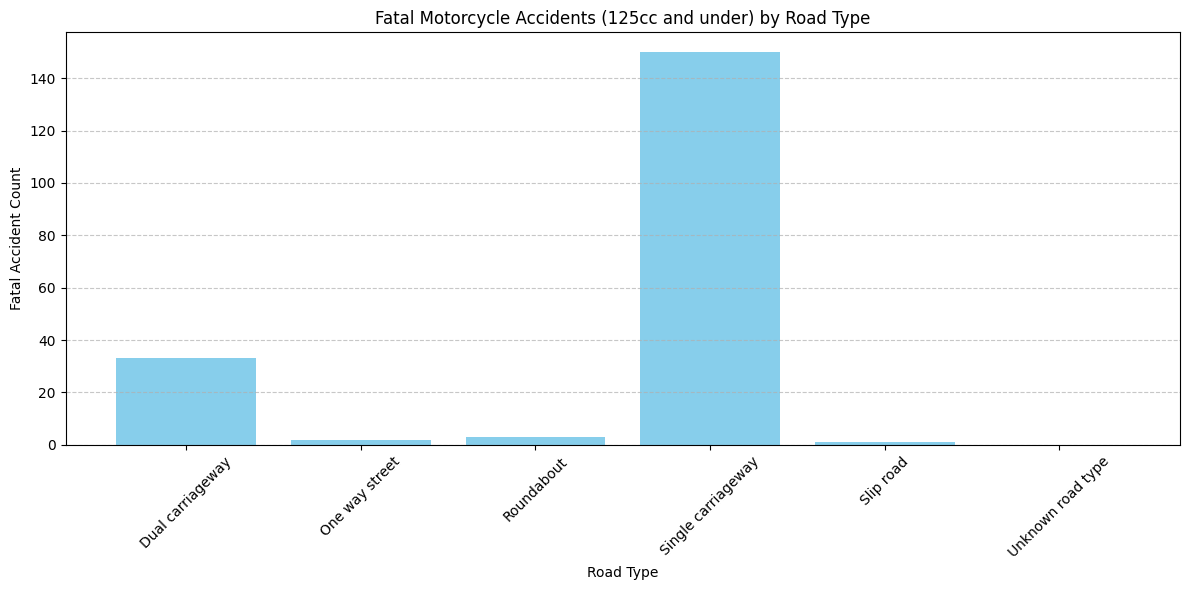

In [47]:
motor_fatal = accident[(accident['Vehicle_Type'] == 'Motorcycle 125cc and under') & 
                        (accident['Accident_Severity'] == 'Fatal')]

road_counts = motor_fatal.groupby('Road_Type').size().reset_index(name='Accident Count')

plt.figure(figsize=(12, 6))
bars = plt.bar(road_counts['Road_Type'], road_counts['Accident Count'], color='skyblue')
plt.xlabel('Road Type')
plt.ylabel('Fatal Accident Count')
plt.title('Fatal Motorcycle Accidents (125cc and under) by Road Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> Question 24: How many serious accident severity happen on Rural area with 2 or more vehicles involved?
<h3> Insight 24: There are 22,513 serious accidents that happened in rural areas with 2 or more vehicles involved, which accounts for 3.41% of the total accidents.</h3>

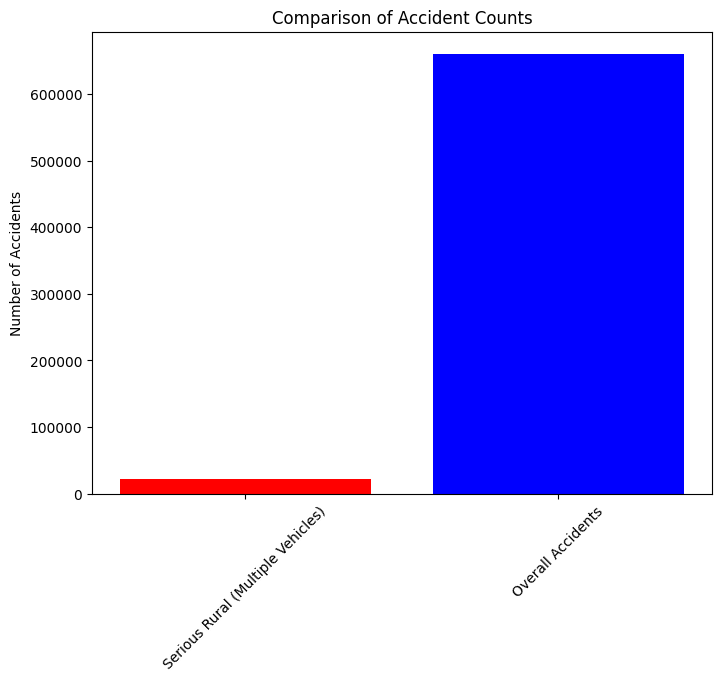

In [73]:
insight_five = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Urban_or_Rural_Area'] == 'Rural') & (accident['Number_of_Vehicles'] > 1)]

count_insight = insight_five.shape[0]
total_accidents = accident.shape[0]

serious_rural = pd.DataFrame({
    'Category': ['Serious Rural (Multiple Vehicles)', 'Overall Accidents'],
    'Count': [count_insight, total_accidents]
})

plt.figure(figsize=(8,6))
plt.bar(serious_rural['Category'], serious_rural['Count'], color=['red', 'blue'])
plt.ylabel("Number of Accidents")
plt.title("Comparison of Accident Counts")
plt.xticks(rotation=45)
plt.show()

<h2> Question 25: What is the weather condition where largest number of serious accidents happen at Single carriage way?
<h3> Insight 25: The weather condition where most of the serious accidents happen on single carriageways is "Fine no high winds," with a total count of 57,396 incidents, which accounts for 8.69% of the total accidents.</h3>

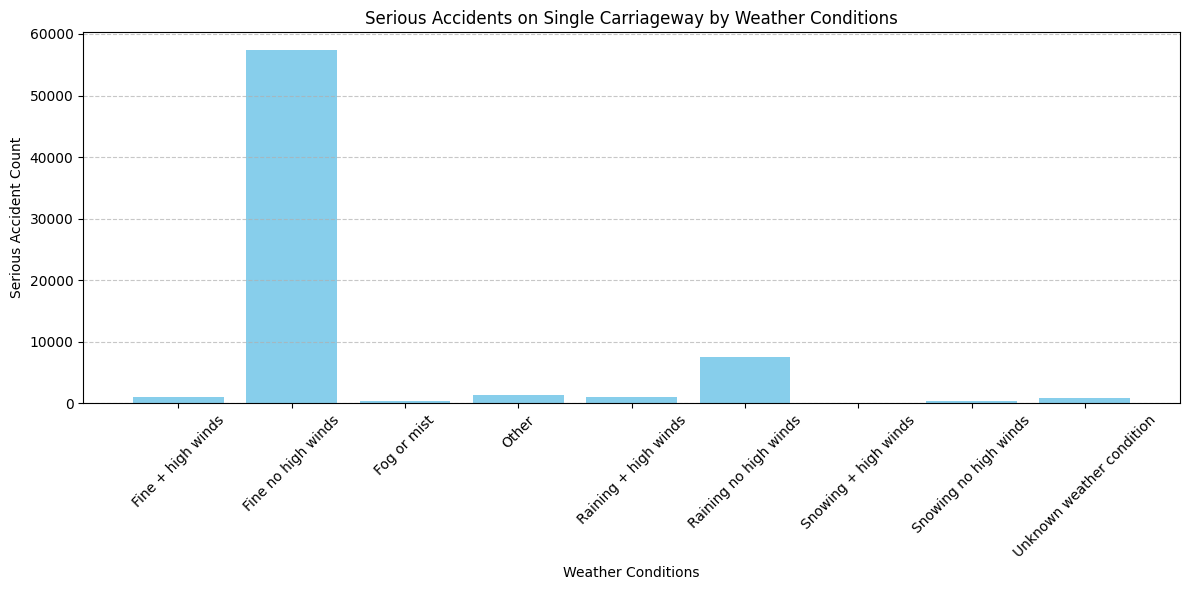

In [74]:
serious_single_carriageway = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Road_Type'] == 'Single carriageway')]
serious_accident_single = serious_single_carriageway.groupby('Weather_Conditions').size().reset_index(name='Accident count')
serious_accident_single.nlargest(1, 'Accident count')

plt.figure(figsize=(12, 6))
bars = plt.bar(serious_accident_single['Weather_Conditions'], serious_accident_single['Accident count'], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Serious Accident Count')
plt.title('Serious Accidents on Single Carriageway by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h2> Question 26: On what season most of the vehicles got accident on Rural area with Fatal Severity?
<h3> Insight 26: Most fatal accidents in rural areas occur during the summer, with a total count of 1,502 incidents, accounting for 0.23% of the total accidents</h3>

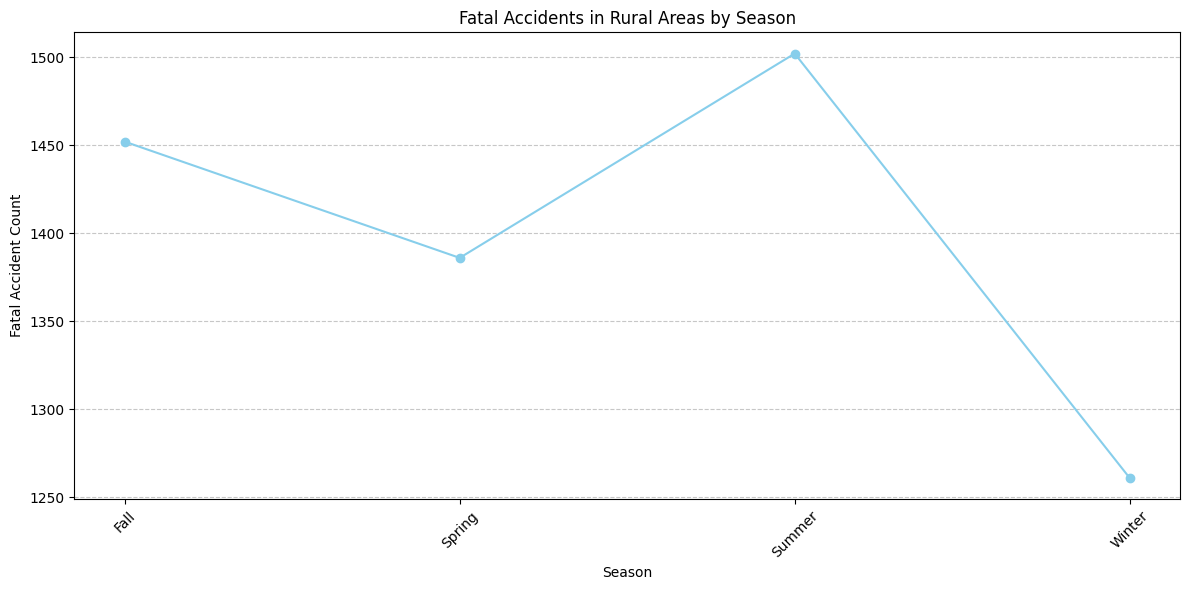

In [76]:
fatal_rural = accident[(accident['Urban_or_Rural_Area'] == 'Rural') & (accident['Accident_Severity'] == 'Fatal')]
fatal_rural_counts = fatal_rural.groupby('Season').size().reset_index(name='Accident count')

plt.figure(figsize=(12, 6))
plt.plot(fatal_rural_counts['Season'], fatal_rural_counts['Accident count'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Fatal Accident Count')
plt.title('Fatal Accidents in Rural Areas by Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> Question 26: On what dayofweek most of the car accident happens during Summer?
<h3> Insight 26: Most car accidents during summer happen on Fridays, with a total count of 20,464 incidents, accounting for 3.10% of the total accidents</h3>

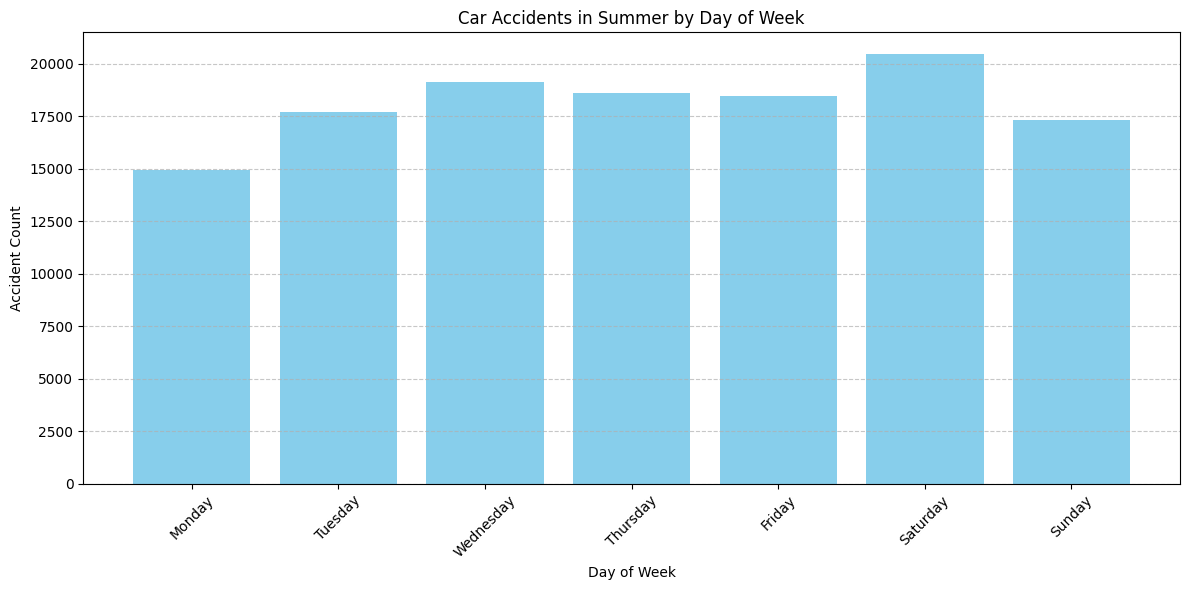

In [82]:
car_summer = accident[(accident['Vehicle_Type'] == 'Car') & (accident['Season'] == 'Summer')]
car_summer_counts = car_summer.groupby('DayofWeek').size().reset_index(name='Accident count')

day_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

car_summer_counts['DayofWeek'] = car_summer_counts['DayofWeek'].map(day_of_week)
plt.figure(figsize=(12, 6))
bars = plt.bar(car_summer_counts['DayofWeek'], car_summer_counts['Accident count'], color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.title('Car Accidents in Summer by Day of Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> Question 27: On what weather condition during Friday most Fatal accidents happen?
<h3> Insight 27: Most fatal accidents on Fridays occur under the "Fine no high winds" weather condition, with a total count of 1,077 incidents</h3>

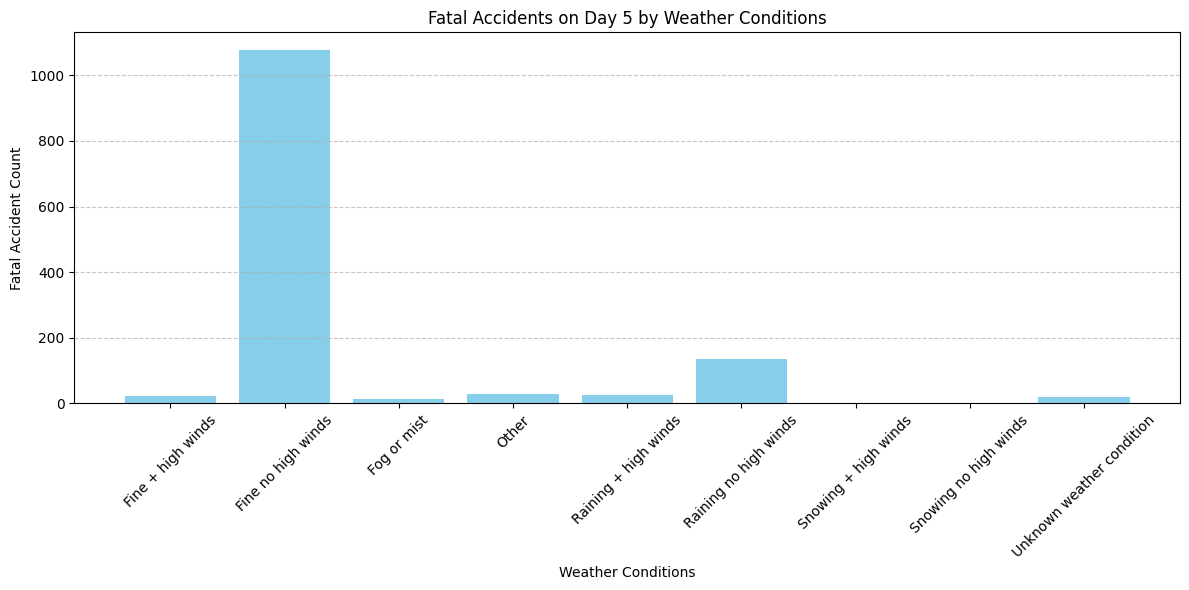

In [83]:
fri_fa = accident[(accident['DayofWeek'] == 5) & (accident['Accident_Severity'] == 'Fatal')]
fri_fa_counts = fri_fa.groupby('Weather_Conditions').size().reset_index(name='Accident count')

plt.figure(figsize=(12, 6))
bars = plt.bar(fri_fa_counts['Weather_Conditions'], fri_fa_counts['Accident count'], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Fatal Accident Count')
plt.title('Fatal Accidents on Day 5 by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> Insight 28: Cars have the highest count of accidents across all severities, with 6,577 fatal, 66,461 serious, and 424,954 slight accidents. This suggests that cars are involved in the majority of accidents, possibly due to their prevalence on the road.

<h2> Insight 29: Motorcycles, especially those over 500cc, exhibit a notable number of accidents: 339 fatal, 3,457 serious, and 21,861 slight accidents. This highlights the need for targeted safety measures for motorcycle riders, such as improved protective gear and stricter enforcement of traffic regulations. </h2>

<h2> Insight 30: Buses and coaches (17 or more passenger seats) also present a substantial number of accidents: 325 fatal, 3,373 serious, and 22,180 slight accidents. This could point to potential safety improvements needed in public transportation systems, such as better driver training and regular vehicle maintenance checks.</h2>

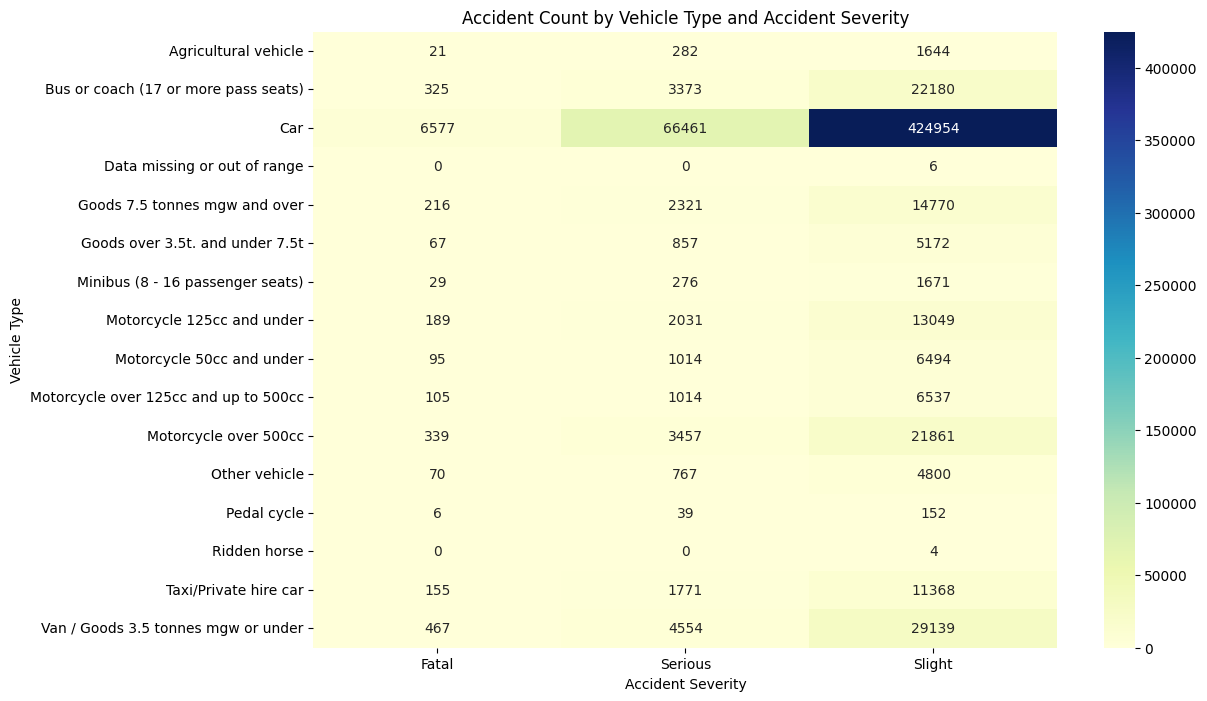

In [84]:
severe_veh_pivot = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size().unstack().T

plt.figure(figsize=(12, 8))
sns.heatmap(severe_veh_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Accident Count by Vehicle Type and Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Vehicle Type")
plt.show()

In [54]:
accident.groupby(['Road_Surface_Conditions', 'Season', 'Year']).size().unstack()

Year                                    2019   2020   2021   2022
Road_Surface_Conditions        Season                            
Dry                            Fall    34026  28107  28389  25834
                               Spring  36242  31025  33083  30492
                               Summer  34878  32756  33396  31219
                               Winter  20202  21618  15415  11139
Flood over 3cm. deep           Fall       38    114    108     31
                               Spring     38     50     20     19
                               Summer    138     74     65     36
                               Winter     98     93     67     28
Frost or ice                   Fall      260    529    116    849
                               Spring    101    205    103    343
                               Summer      4      5      1      4
                               Winter   2204   3131   5045   5617
Snow                           Fall       33    114     18    393
                               Spring     91    212     60     14
                               Summer      9      4      4      3
                               Winter    401    268   1727   2539
Unknown road surface condition Fall       49     49     49     51
                               Spring     39     49     37     49
                               Summer     58     54     28     32
                               Winter     53     58     38     33
Wet or damp                    Fall    12952  15973  15419  12958
                               Spring   8496   9683   6425   5306
                               Summer  11347   9308   8157   6259
                               Winter  20358  17112  15784  11171

In [55]:
accident.groupby(['Accident_Severity', 'Vehicle_Type', 'Light_Conditions']).size().unstack()

Light_Conditions                                         Darkness - lighting unknown  \
Accident_Severity Vehicle_Type                                                         
Fatal             Agricultural vehicle                                             0   
                  Bus or coach (17 or more pass seats)                             2   
                  Car                                                             56   
                  Data missing or out of range                                     0   
                  Goods 7.5 tonnes mgw and over                                    1   
                  Goods over 3.5t. and under 7.5t                                  0   
                  Minibus (8 - 16 passenger seats)                                 1   
                  Motorcycle 125cc and under                                       0   
                  Motorcycle 50cc and under                                        1   
                  Motorcycle over 125cc and up to 500cc                            1   
                  Motorcycle over 500cc                                            1   
                  Other vehicle                                                    0   
                  Pedal cycle                                                      0   
                  Ridden horse                                                     0   
                  Taxi/Private hire car                                            2   
                  Van / Goods 3.5 tonnes mgw or under                              3   
Serious           Agricultural vehicle                                             2   
                  Bus or coach (17 or more pass seats)                            37   
                  Car                                                            584   
                  Data missing or out of range                                     0   
                  Goods 7.5 tonnes mgw and over                                   26   
                  Goods over 3.5t. and under 7.5t                                  5   
                  Minibus (8 - 16 passenger seats)                                 3   
                  Motorcycle 125cc and under                                      16   
                  Motorcycle 50cc and under                                       13   
                  Motorcycle over 125cc and up to 500cc                           13   
                  Motorcycle over 500cc                                           26   
                  Other vehicle                                                   11   
                  Pedal cycle                                                      1   
                  Ridden horse                                                     0   
                  Taxi/Private hire car                                           21   
                  Van / Goods 3.5 tonnes mgw or under                             36   
Slight            Agricultural vehicle                                            17   
                  Bus or coach (17 or more pass seats)                           228   
                  Car                                                           4274   
                  Data missing or out of range                                     0   
                  Goods 7.5 tonnes mgw and over                                  158   
                  Goods over 3.5t. and under 7.5t                                 54   
                  Minibus (8 - 16 passenger seats)                                16   
                  Motorcycle 125cc and under                                     120   
                  Motorcycle 50cc and under                                       54   
                  Motorcycle over 125cc and up to 500cc                           72   
                  Motorcycle over 500cc                                          201   
                  Other vehicle         

<h2> Area Analysis

In [56]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident Count')

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident Count')

pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


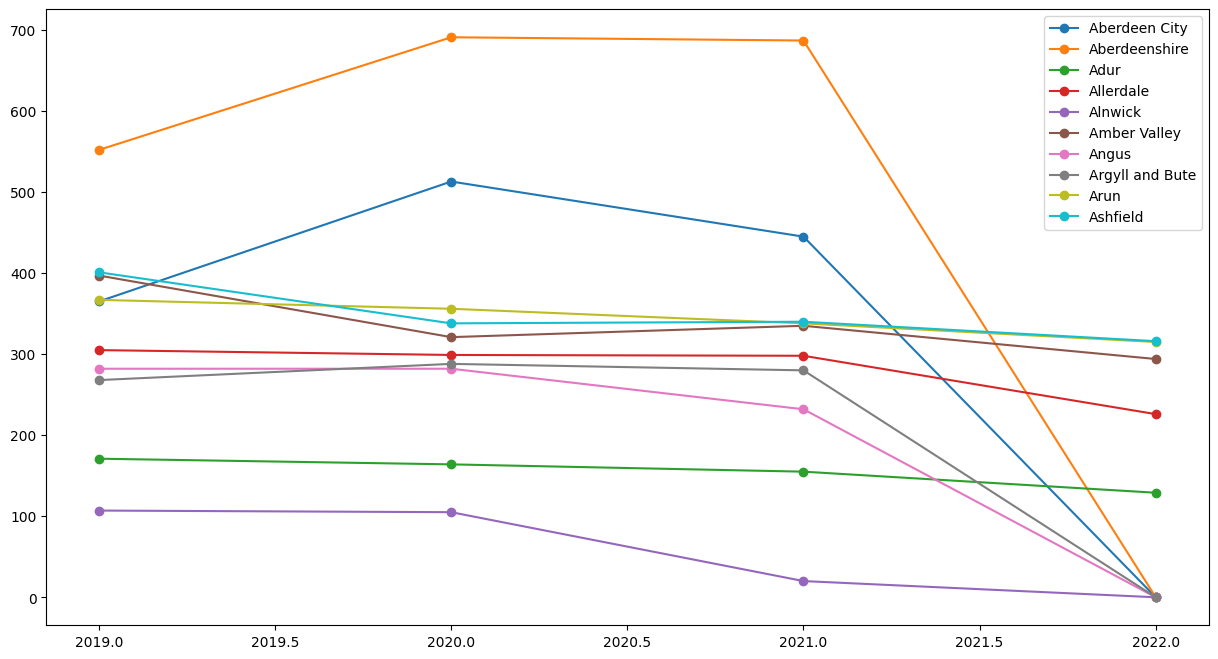

In [57]:
count = 0
for x in pivot_table: 
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x , marker = 'o')
    if count == 10:
        break

plt.gcf().set_size_inches(15, 8)
plt.legend()
plt.show()

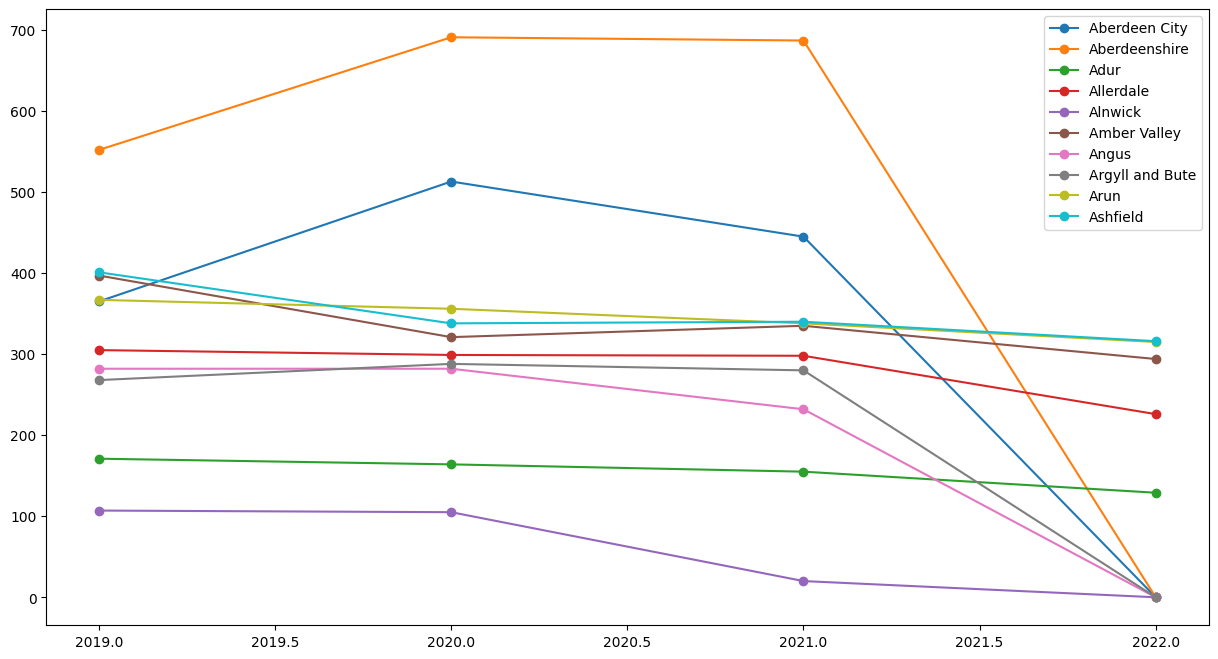

In [58]:
count = 0
for x in pivot_table: 
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x , marker = 'o')
    if count == 10:
        break

plt.gcf().set_size_inches(15, 8)
plt.legend()
plt.show()

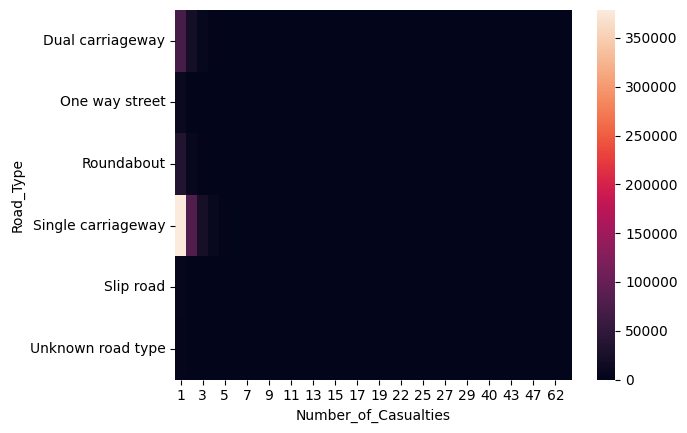

In [59]:
cas_road = accident.groupby(['Road_Type', 'Number_of_Casualties']).size().unstack()

sns.heatmap(cas_road)
plt.show()